## CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

### THEORETICAL CONCEPTS

**Dataset Descirption:**
- Images of traffic signs
- The dataset contains 43 different classes of images.
<br>
<br>

**Problem Statement:**
The goal is to train a Deep Network to classify the traffic signs
<br>
<br>

**What is LeNet?**
LeNet is a pioneering convolutional neural network (CNN) architecture developed by Yann LeCun in the early 1990s. LeNet's architecture comprises two sets of convolutional and pooling layers followed by fully connected layers.

- The convolutional layers extract features from the input images.
- The pooling layers reduce the spatial dimensions of the feature maps.
- Fully connected layers then combine these extracted features to make a final classification decision. 
- LeNet's shallow architecture and relatively small number of parameters make it computationally efficient, allowing it to be trained and deployed on limited hardware resources.

### IMPORT LIBRARIES

In [1]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd #for data manipulation using dataframes
import numpy as np #for data statistical analysis 
import matplotlib.pyplot as plt #for data visualisation
import random

D:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### LOAD THE DATASET

In [2]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data) #for training the network. This data is fed to the network.
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data) #for avoiding overfitting. Expose the network to validation dataset every epoch.
                                         #Assess the progress of the network
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data) #for testing our trained network. This data is never been seen by the network.

In [3]:
X_train, y_train = train['features'], train['labels']
X_val, y_val = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In the above value, we have images of 32x32 (length x width) and 3 channels i.e. RGB (Red, Green, Blue). 34799 is the number of images or the total values in the features column

In [5]:
y_train.shape

(34799,)

The above value is same as the number of images but represents the total values in the labels column

In [6]:
X_val.shape

(4410, 32, 32, 3)

In [7]:
y_val.shape

(4410,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

### IMAGE EXPLORATION

1

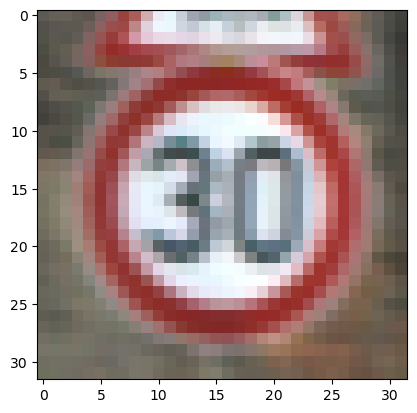

In [10]:
idx = 3400
plt.imshow(X_train[idx])
y_train[idx]

38

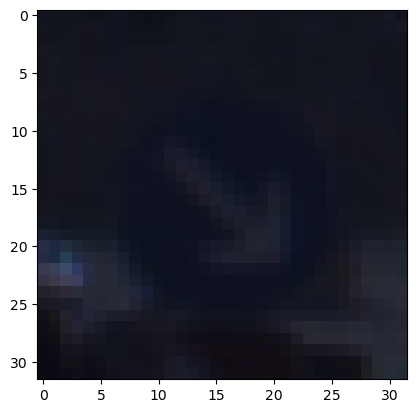

In [11]:
idx = 1890
plt.imshow(X_val[idx])
y_val[idx]

35

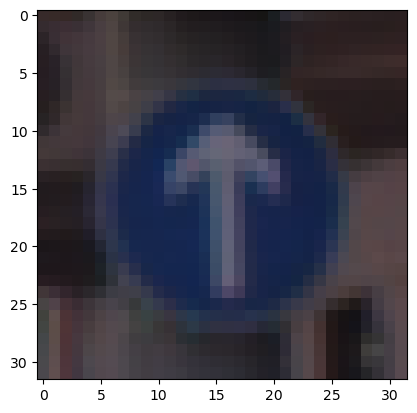

In [12]:
idx = 9965
plt.imshow(X_test[idx])
y_test[idx]

### DATA PREPARATION

In [13]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [14]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True) #Keep dimensions same and average the three channel value to 1. 
                                                        #This makes a gray image.

In [15]:
X_train_gray.shape

(34799, 32, 32, 1)

In [16]:
X_val_gray = np.sum(X_val/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

In [17]:
print(X_val_gray.shape)
print(X_test_gray.shape)

(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [18]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_val_gray_norm = (X_val_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128

In [28]:
X_train_gray_norm.shape

(34799, 32, 32, 1)

In [19]:
X_train_gray_norm[0][0] #values normalized between -1 to 1

array([[-0.8203125 ],
       [-0.81510417],
       [-0.80208333],
       [-0.77083333],
       [-0.76041667],
       [-0.79166667],
       [-0.78645833],
       [-0.78645833],
       [-0.80208333],
       [-0.79947917],
       [-0.77604167],
       [-0.7734375 ],
       [-0.7890625 ],
       [-0.82291667],
       [-0.80989583],
       [-0.75520833],
       [-0.72916667],
       [-0.75260417],
       [-0.75      ],
       [-0.76041667],
       [-0.76302083],
       [-0.765625  ],
       [-0.75      ],
       [-0.73958333],
       [-0.70833333],
       [-0.70833333],
       [-0.72916667],
       [-0.70833333],
       [-0.69791667],
       [-0.74479167],
       [-0.74739583],
       [-0.70572917]])

<Figure size 640x480 with 0 Axes>

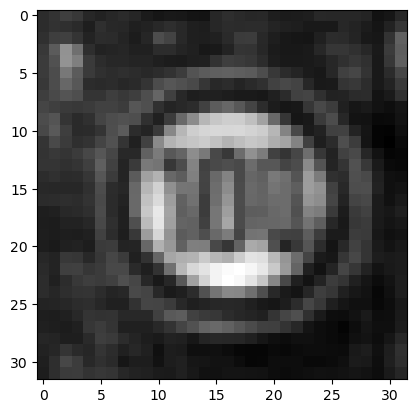

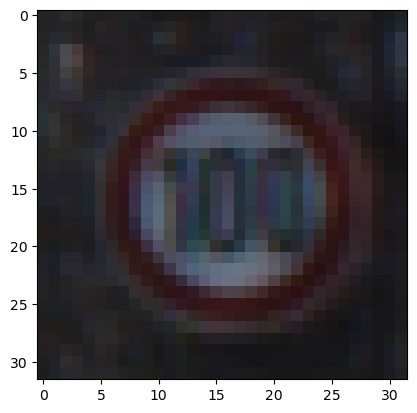

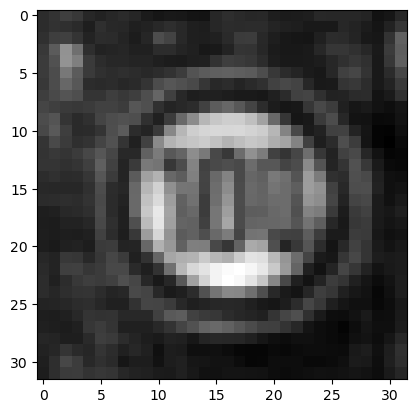

<Figure size 640x480 with 0 Axes>

In [20]:
idx = 457
plt.imshow(X_train_gray[idx].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[idx])
plt.figure()
plt.imshow(X_train_gray_norm[idx].squeeze(), cmap='gray')
plt.figure()

<Figure size 640x480 with 0 Axes>

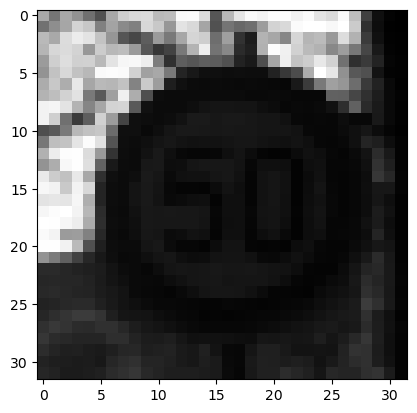

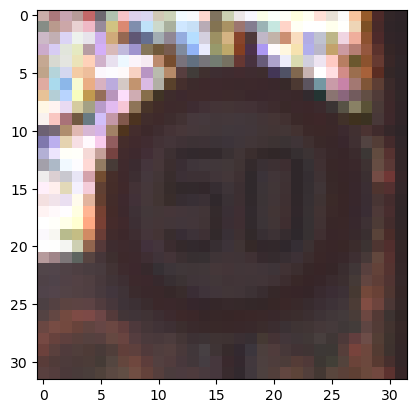

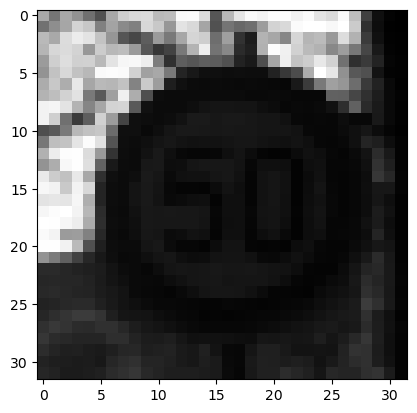

<Figure size 640x480 with 0 Axes>

In [21]:
idx = 790
plt.imshow(X_test_gray[idx].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[idx])
plt.figure()
plt.imshow(X_test_gray_norm[idx].squeeze(), cmap='gray')
plt.figure()

### MODEL TRAINING

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [33]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())
cnn_model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
cnn_model.add(AveragePooling2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(units=120, activation='relu'))
cnn_model.add(Dense(units=84, activation='relu'))
cnn_model.add(Dense(units=43, activation='softmax')) #O/P should be categorical so we need softmax activation

In [34]:
cnn_model.compile(optimizer= Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
cnn_model.fit(X_train_gray_norm, y_train, batch_size=500, epochs=5, 
              verbose=1, validation_data=(X_val_gray_norm, y_val))

Epoch 1/5


70/70 [==============================] - 3s 26ms/step - loss: 3.1752 - accuracy: 0.1755 - val_loss: 2.6506 - val_accuracy: 0.3234
Epoch 2/5
70/70 [==============================] - 2s 21ms/step - loss: 1.6471 - accuracy: 0.5473 - val_loss: 1.4078 - val_accuracy: 0.5930
Epoch 3/5
70/70 [==============================] - 1s 20ms/step - loss: 0.9339 - accuracy: 0.7320 - val_loss: 1.0071 - val_accuracy: 0.7034
Epoch 4/5
70/70 [==============================] - 1s 21ms/step - loss: 0.6547 - accuracy: 0.8198 - val_loss: 0.8151 - val_accuracy: 0.7617
Epoch 5/5
70/70 [==============================] - 1s 21ms/step - loss: 0.5139 - accuracy: 0.8624 - val_loss: 0.7672 - val_accuracy: 0.7703


In [35]:
history = cnn_model.fit(X_train_gray_norm, y_train, batch_size=200, epochs=50, 
              verbose=1, validation_data=(X_val_gray_norm, y_val))

Epoch 1/50
174/174 [==============================] - 3s 11ms/step - loss: 2.3315 - accuracy: 0.3817 - val_loss: 1.3516 - val_accuracy: 0.6005
Epoch 2/50
174/174 [==============================] - 2s 10ms/step - loss: 0.7912 - accuracy: 0.7726 - val_loss: 0.8051 - val_accuracy: 0.7710
Epoch 3/50
174/174 [==============================] - 2s 10ms/step - loss: 0.4913 - accuracy: 0.8639 - val_loss: 0.7086 - val_accuracy: 0.7971
Epoch 4/50
174/174 [==============================] - 2s 10ms/step - loss: 0.3605 - accuracy: 0.9048 - val_loss: 0.6369 - val_accuracy: 0.8129
Epoch 5/50
174/174 [==============================] - 2s 10ms/step - loss: 0.2862 - accuracy: 0.9247 - val_loss: 0.5804 - val_accuracy: 0.8478
Epoch 6/50
174/174 [==============================] - 2s 10ms/step - loss: 0.2351 - accuracy: 0.9389 - val_loss: 0.5986 - val_accuracy: 0.8295
Epoch 7/50
174/174 [==============================] - 2s 10ms/step - loss: 0.1986 - accuracy: 0.9491 - val_loss: 0.5261 - val_accuracy: 0.8646

### MODEL EVALUATION

In [36]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print("Test Accuracy: {}".format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 1.2578 - accuracy: 0.8937
Test Accuracy: 0.8936658501625061


In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

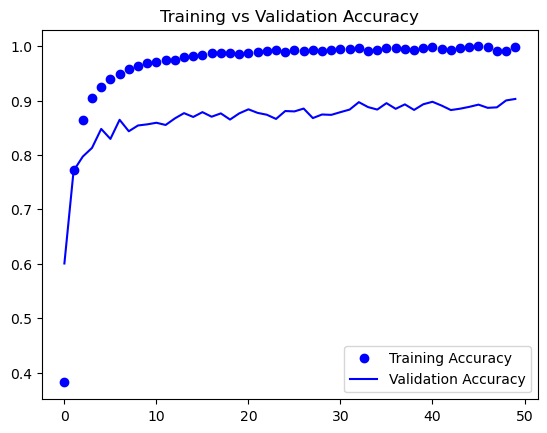

In [42]:
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

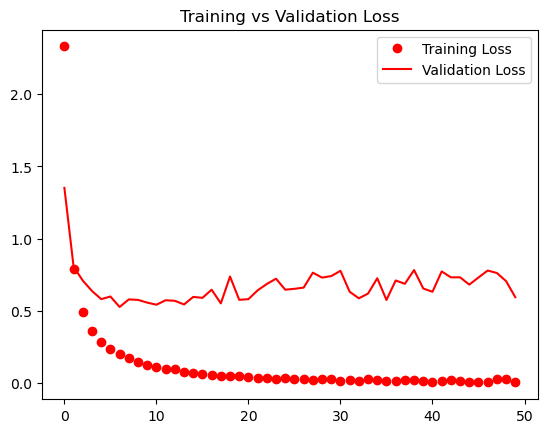

In [44]:
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

In [50]:
y_pred_probs = cnn_model.predict(X_test_gray_norm)
y_pred = y_pred_probs.argmax(axis=-1)
y_true = y_test

395/395 [==============================] - 1s 2ms/step


In [51]:
y_true

array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

In [52]:
y_pred

array([16,  1, 38, ...,  3,  7, 10], dtype=int64)

In [53]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_true, y_pred)

<AxesSubplot:>

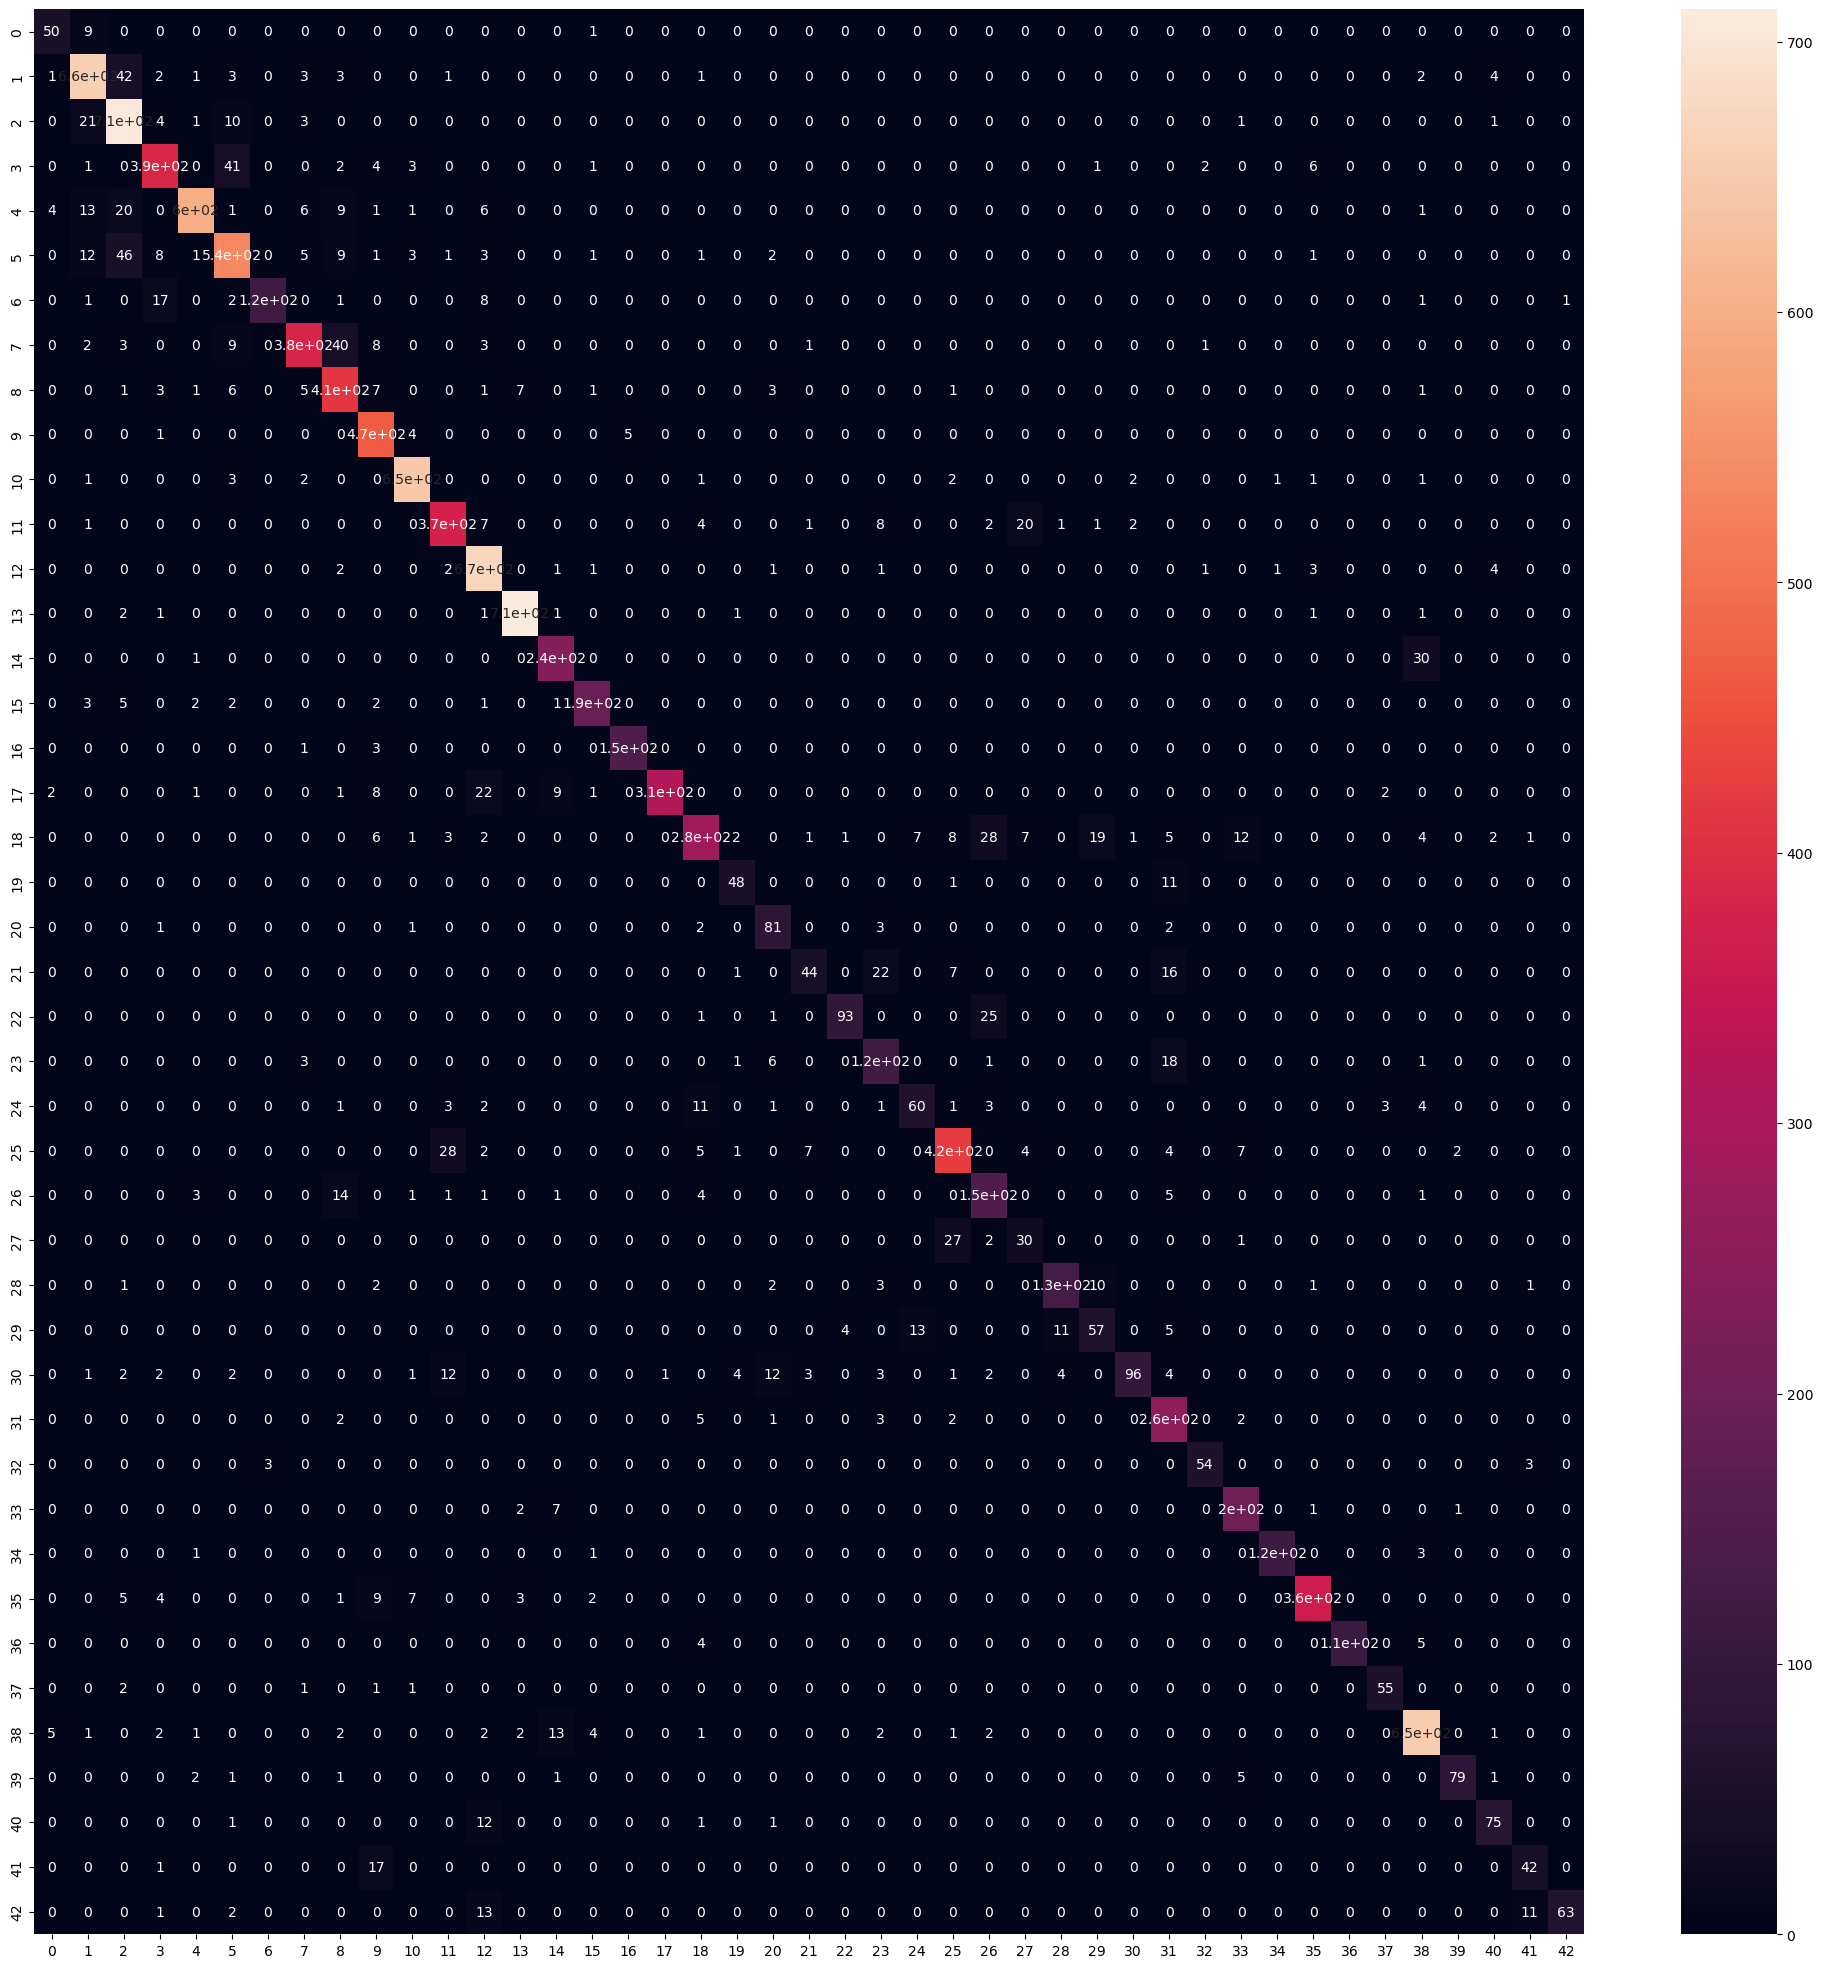

In [55]:
plt.figure(figsize=(25,25))
sns.heatmap(cn, annot=True)

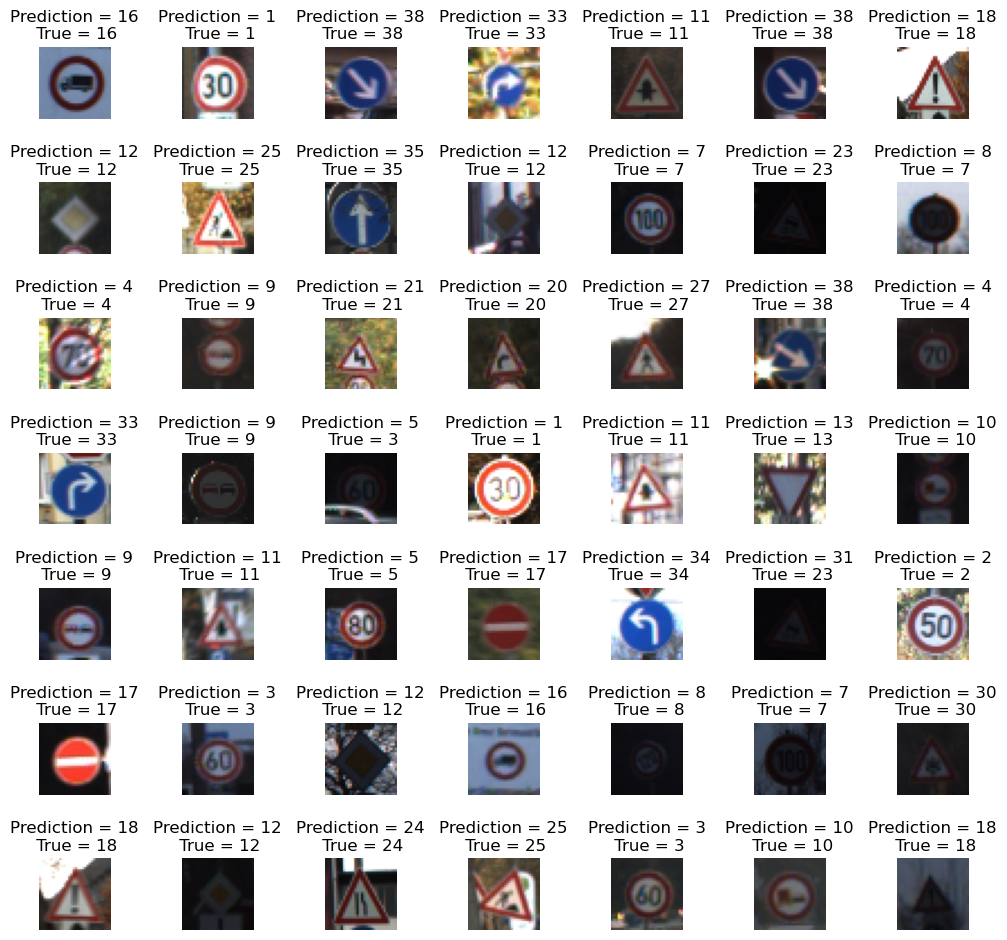

In [60]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction = {}\n True = {}".format(y_pred[i], y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)


### EXPERIMENTING WITH CNN MODEL

In [64]:
# build a sequential model
model = Sequential()
# 1st conv block
model.add(Conv2D(25, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(50, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
# FCNN block
model.add(Flatten())
model.add(Dense(units=240, activation='relu'))
model.add(Dense(units=120, activation='relu'))
model.add(Dropout(0.25))
# output layer
model.add(Dense(units=43, activation='softmax'))

In [65]:
model.compile(optimizer= Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_gray_norm, y_train, batch_size=200, epochs=50, 
              verbose=1, validation_data=(X_val_gray_norm, y_val))

Epoch 1/50
174/174 [==============================] - 15s 79ms/step - loss: 2.5795 - accuracy: 0.2998 - val_loss: 1.2639 - val_accuracy: 0.6556
Epoch 2/50
174/174 [==============================] - 14s 79ms/step - loss: 0.6833 - accuracy: 0.7945 - val_loss: 0.6220 - val_accuracy: 0.8145
Epoch 3/50
174/174 [==============================] - 14s 82ms/step - loss: 0.2789 - accuracy: 0.9152 - val_loss: 0.5354 - val_accuracy: 0.8524
Epoch 4/50
174/174 [==============================] - 15s 88ms/step - loss: 0.1613 - accuracy: 0.9529 - val_loss: 0.4237 - val_accuracy: 0.8889
Epoch 5/50
174/174 [==============================] - 19s 112ms/step - loss: 0.1043 - accuracy: 0.9699 - val_loss: 0.3708 - val_accuracy: 0.8952
Epoch 6/50
174/174 [==============================] - 15s 88ms/step - loss: 0.0702 - accuracy: 0.9797 - val_loss: 0.3799 - val_accuracy: 0.9132
Epoch 7/50
174/174 [==============================] - 15s 88ms/step - loss: 0.0565 - accuracy: 0.9837 - val_loss: 0.4062 - val_accuracy

In [66]:
score = model.evaluate(X_test_gray_norm, y_test)
print("Test Accuracy: {}".format(score[1]))

395/395 [==============================] - 2s 6ms/step - loss: 0.6783 - accuracy: 0.9316
Test Accuracy: 0.9315914511680603


In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

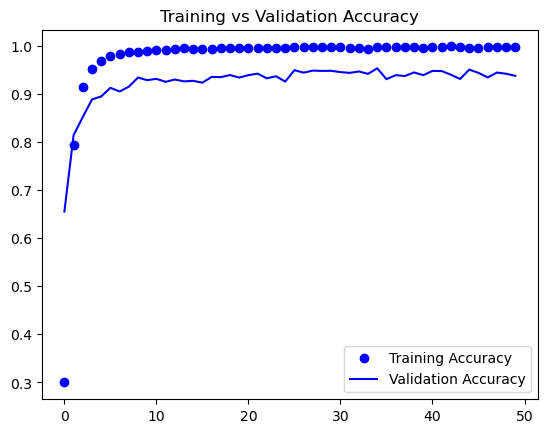

In [68]:
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

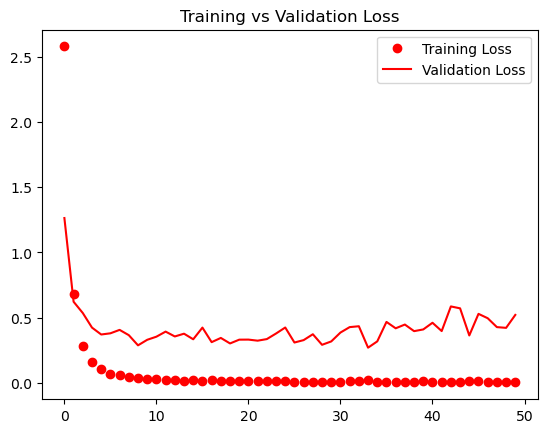

In [69]:
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

In [70]:
y_pred_probs = model.predict(X_test_gray_norm)
y_pred = y_pred_probs.argmax(axis=-1)
y_true = y_test

395/395 [==============================] - 2s 5ms/step


<AxesSubplot:>

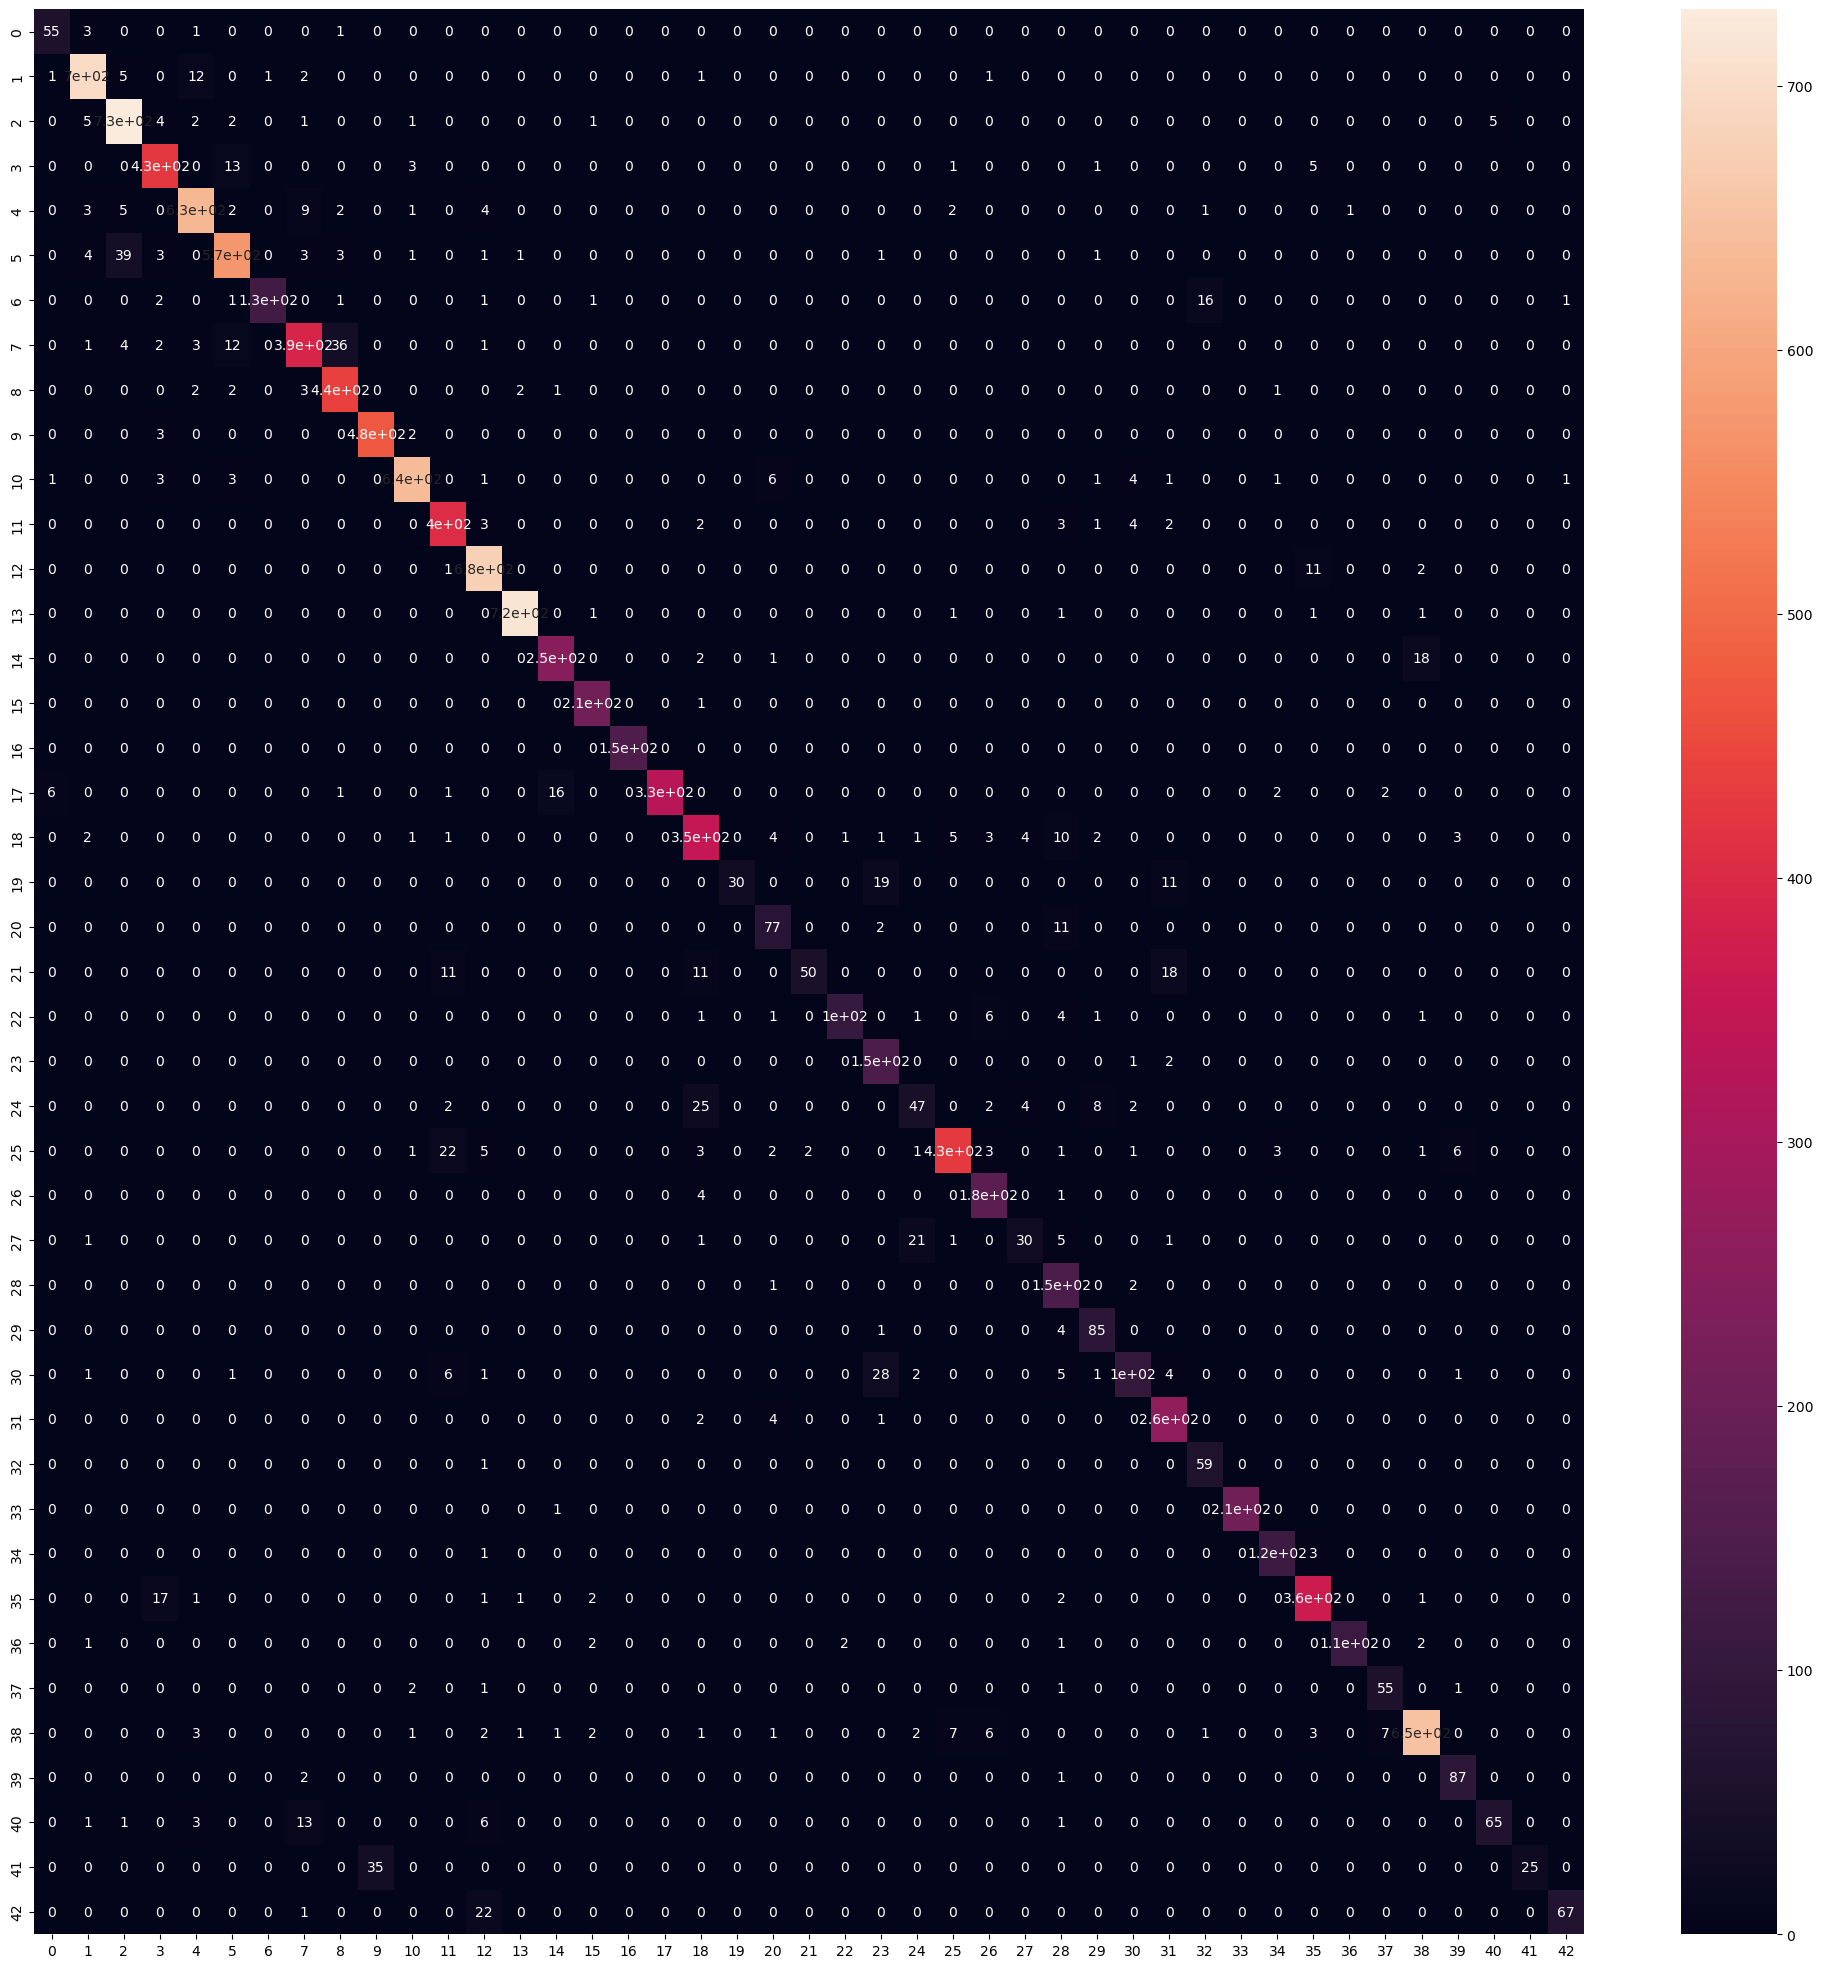

In [71]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(25,25))
sns.heatmap(cn, annot=True)

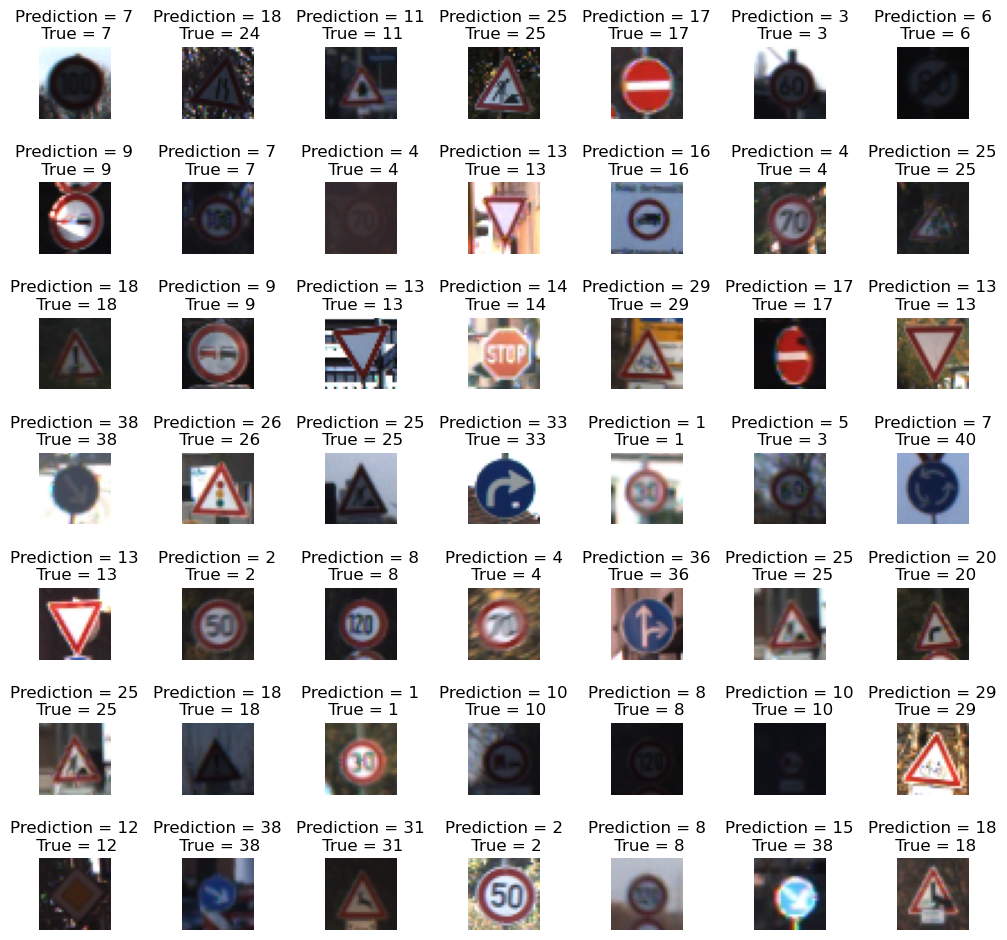

In [73]:
IDX = 150
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i+IDX])
    axes[i].set_title("Prediction = {}\n True = {}".format(y_pred[i+IDX], y_true[i+IDX]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)
